Install Gspread to import Google Sheets

In [ ]:
## install gspread to download Google sheets
!pip install --upgrade gspread


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import data from Google drive
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

workbook = gc.open_by_url('https://docs.google.com/spreadsheets/d/1IfYeYtcp1xX4JkInVZSf8fU7FP3eFcrspbDwnasHEKg/edit#gid=1746523826')
ws = workbook.worksheet('World Energy Consumption')

# get_all_values gives a list of rows.
rows = ws.get_all_values()


# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows)
#set column names equal to values in row index position 0
df.columns = df.iloc[0]
#remove first row from DataFrame
df = df[1:]
print(df.head(10))

0  iso_code      country  year coal_prod_change_pct coal_prod_change_twh  \
1       AFG  Afghanistan  1900                                             
2       AFG  Afghanistan  1901                                         0   
3       AFG  Afghanistan  1902                                         0   
4       AFG  Afghanistan  1903                                         0   
5       AFG  Afghanistan  1904                                         0   
6       AFG  Afghanistan  1905                                         0   
7       AFG  Afghanistan  1906                                         0   
8       AFG  Afghanistan  1907                                         0   
9       AFG  Afghanistan  1908                                         0   
10      AFG  Afghanistan  1909                                         0   

0  gas_prod_change_pct gas_prod_change_twh oil_prod_change_pct  \
1                                                                
2                              

In [ ]:
## describe dataframe shape
df.shape

(17432, 122)

In [ ]:
#display 500 rows max
pd.set_option('display.max_rows', 500)

Create dataframe Energy consumption by country an year

In [ ]:
Energy_comsumption_by_country_year = df.loc[:,df.columns.str.contains('year|consumption|country')]
display(Energy_comsumption_by_country_year)

,country,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
1,Afghanistan,1900,,,,,,,,,,,,,
2,Afghanistan,1901,,,,,,,,,,,,,
3,Afghanistan,1902,,,,,,,,,,,,,
4,Afghanistan,1903,,,,,,,,,,,,,
5,Afghanistan,1904,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17428,Zimbabwe,2015,0,,,,,,,,,55.642,,,
17429,Zimbabwe,2016,0,,,,,,,,,47.5,,,
17430,Zimbabwe,2017,0,,,,,,,,,,,,
17431,Zimbabwe,2018,0,,,,,,,,,,,,


Energy_comsumption_by_country_year=Energy_comsumption_by_country_year.mask(df == '')
# Repalce blanks with Nan

In [ ]:
Energy_consumption_by_country_year =Energy_comsumption_by_country_year.mask(Energy_comsumption_by_country_year == '')

##Repalce blanks with Nan



In [ ]:
# drop all rows where all fields are NaN
Energy_consumption_by_country_year.dropna(how='all',axis=0,inplace=True)

#drop all columns where all cells are Nan
Energy_comsumption_by_country_year.dropna(how='all',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
#Transform strings to numeric data types
Energy_consumption_by_country_year[["biofuel_consumption","coal_consumption","fossil_fuel_consumption","gas_consumption","hydro_consumption","low_carbon_consumption","nuclear_consumption","oil_consumption","other_renewable_consumption","primary_energy_consumption","renewables_consumption", "solar_consumption","wind_consumption" ]] = Energy_consumption_by_country_year[["biofuel_consumption","coal_consumption","fossil_fuel_consumption","gas_consumption","hydro_consumption","low_carbon_consumption","nuclear_consumption","oil_consumption","other_renewable_consumption","primary_energy_consumption","renewables_consumption", "solar_consumption","wind_consumption" ]].apply(pd.to_numeric)
Energy_consumption_by_country_year.dtypes

0
country                         object
year                            object
biofuel_consumption            float64
coal_consumption               float64
fossil_fuel_consumption        float64
gas_consumption                float64
hydro_consumption              float64
low_carbon_consumption         float64
nuclear_consumption            float64
oil_consumption                float64
other_renewable_consumption    float64
primary_energy_consumption     float64
renewables_consumption         float64
solar_consumption              float64
wind_consumption               float64
dtype: object

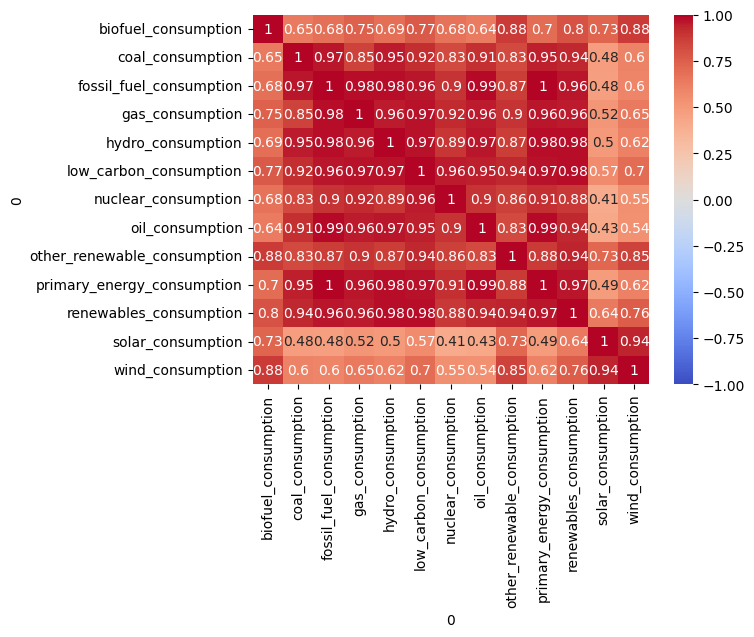

In [ ]:
#import matplotlib and seaborn
import matplotlib.pyplot as mp

import seaborn as sb
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot

Energy_consumption_by_country_year.corr()
  
sb.heatmap(Energy_consumption_by_country_year.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

In [ ]:
import logging, sys

logging.basicConfig(
    format="%(asctime)s.%(msecs)03dZ - %(levelname)s - %(name)s - %(message)s",
    datefmt="%Y-%m-%dT%H:%M:%S",
    level=logging.INFO,
    stream=sys.stdout
)

logger = logging.getLogger(__name__)

logging.getLogger('botocore').setLevel(logging.INFO)
logging.getLogger('fsspec').setLevel(logging.DEBUG)

In [ ]:
from tempfile import mkdtemp
from urllib.request import urlretrieve

tmp_dir = mkdtemp()

# Upload Countries Basic Fields
countries_basic_csv_path = f"{tmp_dir}/Countries_Basic_Fields.csv"
urlretrieve("https://github.com/amycelliott/DMP_LP_2022/blob/main/files/Countries_Basic_Fields.csv?raw=true", countries_basic_csv_path)
logger.info(f"Downloaded sample CSV file to {countries_basic_csv_path}")

In [ ]:
import numpy as np

df_country_basic = pd.read_csv(
    countries_basic_csv_path, 
    # if your dataset doesn't have column names in the first row, you need to specify them like this
    #header=0, names=["iso_code","country", "year", "energy_per_gdp", "energy_per_capita", "per_capita_electricity", "population", "primary_energy_consumption", "gdp"]
)

df_country_basic.info()

# after loading, we can explore the data in all different ways pandas support
# No need to do this yet
df_country_basic = df_country_basic.sort_values('year', ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15630 entries, 0 to 15629
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso_code                    15630 non-null  object 
 1   country                     15630 non-null  object 
 2   year                        15630 non-null  int64  
 3   energy_per_gdp              6887 non-null   float64
 4   energy_per_capita           8833 non-null   float64
 5   per_capita_electricity      5374 non-null   float64
 6   population                  15411 non-null  float64
 7   primary_energy_consumption  8916 non-null   float64
 8   gdp                         10366 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.1+ MB


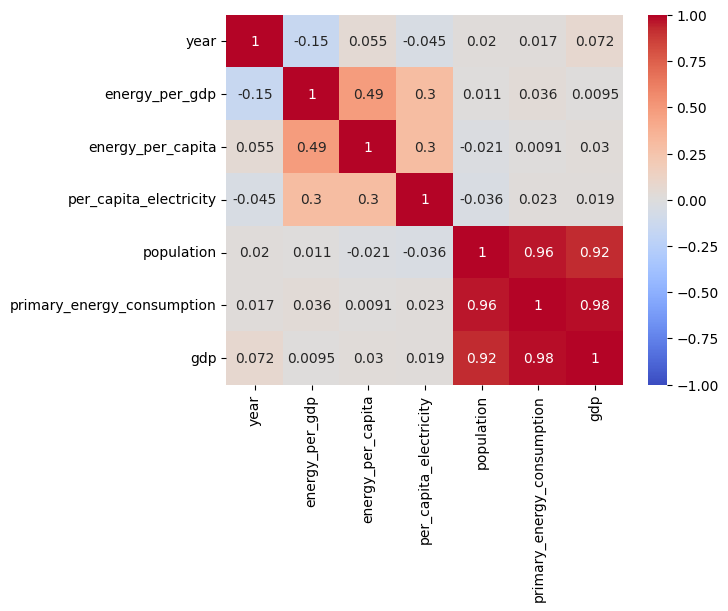

In [ ]:
#examine Correlation of country data using heat map
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot

df_country_basic.corr()
  
sb.heatmap(df_country_basic.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')


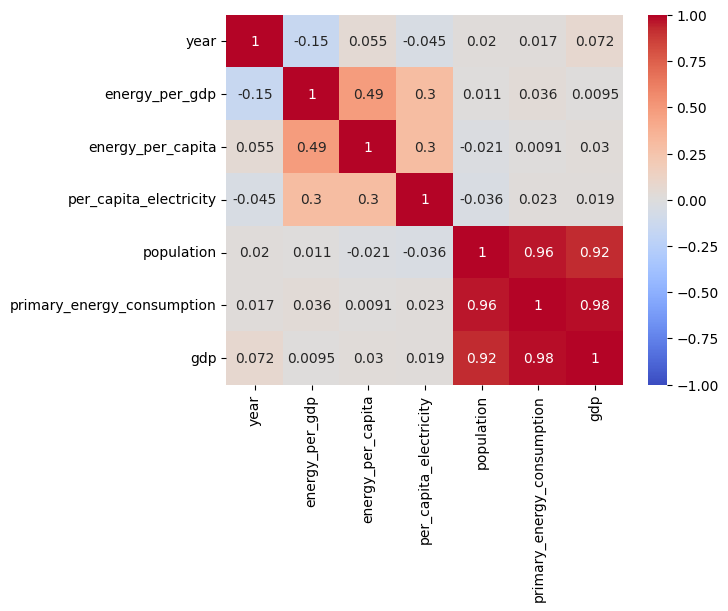

In [ ]:
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot

df_country_basic.corr()
  
sb.heatmap(df_country_basic.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

Group by Year

In [ ]:
Energy_consumption_by_country_year_group = Energy_consumption_by_country_year.groupby(['year']).sum().reset_index()
Energy_consumption_by_country_year_group.dtypes


0
year                            object
biofuel_consumption            float64
coal_consumption               float64
fossil_fuel_consumption        float64
gas_consumption                float64
hydro_consumption              float64
low_carbon_consumption         float64
nuclear_consumption            float64
oil_consumption                float64
other_renewable_consumption    float64
primary_energy_consumption     float64
renewables_consumption         float64
solar_consumption              float64
wind_consumption               float64
dtype: object

In [ ]:
Energy_consumption_by_country_year_group.head(5)

,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
0,1900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Group by country

In [ ]:
Energy_consumption_groupby_country = Energy_consumption_by_country_year.groupby(['country']).sum().reset_index()
Energy_consumption_groupby_country.dtypes

0
country                         object
biofuel_consumption            float64
coal_consumption               float64
fossil_fuel_consumption        float64
gas_consumption                float64
hydro_consumption              float64
low_carbon_consumption         float64
nuclear_consumption            float64
oil_consumption                float64
other_renewable_consumption    float64
primary_energy_consumption     float64
renewables_consumption         float64
solar_consumption              float64
wind_consumption               float64
dtype: object

In [ ]:
pivotTable = pd.pivot_table(Energy_consumption_by_country_year, index=['country'])
print(pivotTable)


0                                 biofuel_consumption  coal_consumption  \
country                                                                   
Afghanistan                                       NaN               NaN   
Africa                                       0.067509        815.099618   
Albania                                           NaN               NaN   
Algeria                                      0.000000          4.867927   
American Samoa                                    NaN               NaN   
Angola                                       0.000000               NaN   
Antigua and Barbuda                               NaN               NaN   
Argentina                                    2.519909         10.633636   
Armenia                                           NaN               NaN   
Aruba                                             NaN               NaN   
Asia Pacific                                      NaN      14011.062873   
Australia                

In [ ]:
from datetime import datetime
con=Energy_consumption_by_country_year_group['year']
Energy_consumption_by_country_year_group['year']=pd.to_datetime(Energy_consumption_by_country_year_group['year'])
Energy_consumption_by_country_year_group.set_index('year', inplace=True)
#check datatype of index
Energy_consumption_by_country_year_group.index

DatetimeIndex(['1900-01-01', '1901-01-01', '1902-01-01', '1903-01-01',
               '1904-01-01', '1905-01-01', '1906-01-01', '1907-01-01',
               '1908-01-01', '1909-01-01',
               ...
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='year', length=121, freq=None)

Pie chart comparing Top 3 Energy Users vs World

In [ ]:
# filter dataframe
US_China = ['China','United States','Canada','World']
US_China_cons = Energy_consumption_by_country_year.loc[Energy_consumption_by_country_year['country'].isin(US_China)]
World_cons = Energy_consumption_by_country_year[Energy_consumption_by_country_year['country'] == 'World']

In [ ]:
China_US_energy_cons_2000 = US_China_cons[US_China_cons['year'].str.contains("2000")]
China_US_energy_cons_2019 = US_China_cons[US_China_cons['year'].str.contains("2019")]

display(China_US_energy_cons_2000)
display(China_US_energy_cons_2019)


,country,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
2992,Canada,2000,0.000,355.736,2340.522,892.208,991.001,1217.365,200.816,1092.578,24.770,3557.887,1016.550,0.046,0.733
3446,China,2000,0.000,8211.413,11119.510,246.958,617.806,673.045,46.492,2661.139,7.047,11792.554,626.553,0.061,1.639
16350,United States,2000,39.074,6286.541,23224.264,6283.912,757.671,3203.199,2204.367,10653.812,184.952,26427.463,998.832,1.440,15.694
17005,World,2000,126.039,27417.313,94314.391,23999.887,7366.566,15268.987,7169.170,42897.191,516.820,109583.378,8099.817,3.112,87.280


,country,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
3011,Canada,2019,23.322,155.176,2608.280,1203.126,945.858,1340.072,248.825,1249.979,26.765,3948.352,1091.247,10.684,84.618
3465,China,2019,27.583,22687.462,33512.486,3073.339,3143.991,5848.439,863.457,7751.686,254.629,39360.925,4984.982,554.178,1004.602
16369,United States,2019,406.191,3150.181,21891.102,8466.457,671.447,4400.254,2109.762,10274.464,193.987,26291.355,2290.491,268.320,750.547
17024,World,2019,1101.949,43849.215,136761.607,39292.468,10455.127,25427.562,6923.412,53619.925,1614.027,162194.290,18504.151,1792.996,3540.051


In [ ]:
China_US_energy_cons_2000.dtypes

0
country                         object
year                            object
biofuel_consumption            float64
coal_consumption               float64
fossil_fuel_consumption        float64
gas_consumption                float64
hydro_consumption              float64
low_carbon_consumption         float64
nuclear_consumption            float64
oil_consumption                float64
other_renewable_consumption    float64
primary_energy_consumption     float64
renewables_consumption         float64
solar_consumption              float64
wind_consumption               float64
dtype: object

In [ ]:
## add China, US, Canada primary usage
WorldMinus_US_China_Canada_2000 = China_US_energy_cons_2000['primary_energy_consumption'].iloc[3] - China_US_energy_cons_2000['primary_energy_consumption'].iloc[0] - China_US_energy_cons_2000['primary_energy_consumption'].iloc[1] - China_US_energy_cons_2000['primary_energy_consumption'].iloc[2]
display(WorldMinus_US_China_Canada_2000)

67805.47399999999

In [ ]:

US_China_Can_pri = China_US_energy_cons_2000['primary_energy_consumption']
display(US_China_Can_pri)

2992       3557.887
3446      11792.554
16350     26427.463
17005    109583.378
Name: primary_energy_consumption, dtype: float64

Top fossil fuel users

In [ ]:
# filter dataframe
Top_Fossil = ['China','India','Iran','Indonesia','World']
Top_Fossil_Cons = Energy_consumption_by_country_year.loc[Energy_consumption_by_country_year['country'].isin(Top_Fossil)]
World_cons = Energy_consumption_by_country_year[Energy_consumption_by_country_year['country'] == 'World']

#Filter to 2019
Top_Fossil_Cons2019 = Top_Fossil_Cons[Top_Fossil_Cons['year'].str.contains("2019")] 
display(Top_Fossil_Cons2019)

,country,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
3465,China,2019,27.583,22687.462,33512.486,3073.339,3143.991,5848.439,863.457,7751.686,254.629,39360.925,4984.982,554.178,1004.602
7327,India,2019,1.295,5172.223,8612.962,596.809,400.770,848.021,111.833,2843.931,62.774,9460.984,736.188,114.569,156.780
7448,Indonesia,2019,69.168,946.172,2324.602,438.174,42.077,150.750,0.000,940.256,38.882,2475.353,150.750,0.157,0.465
7568,Iran,2019,0.000,14.369,3339.902,2236.185,71.719,88.961,15.874,1089.348,0.061,3428.863,73.087,0.423,0.885
17024,World,2019,1101.949,43849.215,136761.607,39292.468,10455.127,25427.562,6923.412,53619.925,1614.027,162194.290,18504.151,1792.996,3540.051


In [ ]:
#World minus China, India, Indonesia, Iran
WorldMinus_China_India_2019 = Top_Fossil_Cons2019['fossil_fuel_consumption'].iloc[4] - Top_Fossil_Cons2019['fossil_fuel_consumption'].iloc[0] - Top_Fossil_Cons2019['fossil_fuel_consumption'].iloc[1] - Top_Fossil_Cons2019['fossil_fuel_consumption'].iloc[2] -Top_Fossil_Cons2019['fossil_fuel_consumption'].iloc[3]
display(WorldMinus_China_India_2019)

88971.65499999998

In [ ]:
# Add China/US data and subtract World
df = pd.DataFrame({
    'country': ['China', 'India', 'Indonesia', 'Iran', 'Rest of the World'],
    'Fossil Fuel Consumption': [33512.486	, 8612.962, 2324.602, 3339.902,88971.65499999998]})
df.dtypes

country                     object
Fossil Fuel Consumption    float64
dtype: object

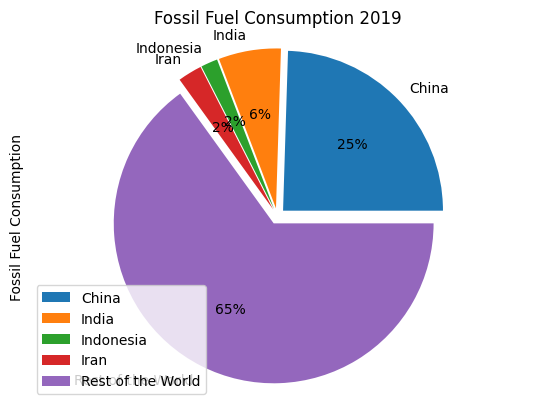

In [ ]:
#importing matplotlib module
import matplotlib.pyplot as plt

# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# Plotting the pie chart for above dataframe
df.groupby(['country']).sum().plot(kind='pie', y='Fossil Fuel Consumption',autopct='%1.0f%%',title='Fossil Fuel Consumption 2019', explode = explode)

plt.axis('equal')
plt.show()

Top renewables 2019

In [ ]:
# filter dataframe
Top_Renewables = ['China','United States','India','Turkey','Brazil', 'World']
Top_Renewables_Cons = Energy_consumption_by_country_year.loc[Energy_consumption_by_country_year['country'].isin(Top_Renewables)]
World_cons = Energy_consumption_by_country_year[Energy_consumption_by_country_year['country'] == 'World']

#Filter to 2019
Top_Renewables_Cons2019 = Top_Renewables_Cons[Top_Renewables_Cons['year'].str.contains("2019")] 
display(Top_Renewables_Cons2019)

,country,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
2234,Brazil,2019,270.924,182.244,1854.374,358.095,988.747,1591.027,40.028,1314.036,139.298,3445.401,1550.999,13.774,138.255
3465,China,2019,27.583,22687.462,33512.486,3073.339,3143.991,5848.439,863.457,7751.686,254.629,39360.925,4984.982,554.178,1004.602
7327,India,2019,1.295,5172.223,8612.962,596.809,400.770,848.021,111.833,2843.931,62.774,9460.984,736.188,114.569,156.780
15799,Turkey,2019,0.000,471.240,1467.992,432.201,220.778,333.035,0.000,564.551,31.474,1802.849,333.035,27.039,53.744
16369,United States,2019,406.191,3150.181,21891.102,8466.457,671.447,4400.254,2109.762,10274.464,193.987,26291.355,2290.491,268.320,750.547
17024,World,2019,1101.949,43849.215,136761.607,39292.468,10455.127,25427.562,6923.412,53619.925,1614.027,162194.290,18504.151,1792.996,3540.051


In [ ]:
# Add China/US data and subtract World
df = pd.DataFrame({
    'country': ['China', 'India', 'Turkey', 'United States', 'Brazil', 'Rest of the World'],
    'Renewables Consumption': [4984.982	, 736.188,333.035 , 2290.491,1550.999, 8608.465]})

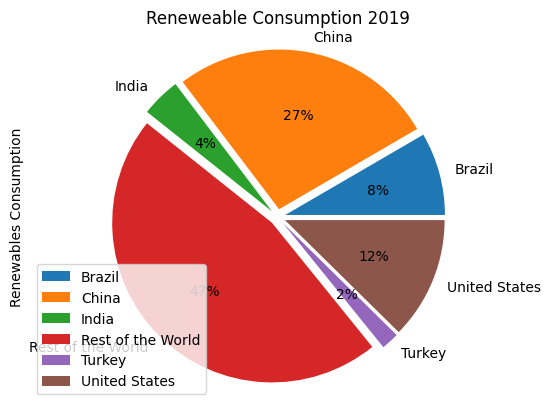

In [ ]:
#importing matplotlib module
import matplotlib.pyplot as plt

# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

# Plotting the pie chart for above dataframe
df.groupby(['country']).sum().plot(kind='pie', y='Renewables Consumption',autopct='%1.0f%%',title='Reneweable Consumption 2019', explode = explode)

plt.axis('equal')
plt.show()
plt.show()

In [ ]:
Energy_consumption_by_country_year_group.drop(Energy_consumption_by_country_year_group.tail(1).index,
        inplace = True)

In [ ]:
Energy_consumption_by_country_year_group.drop(Energy_consumption_by_country_year_group.head(60).index,
        inplace = True)

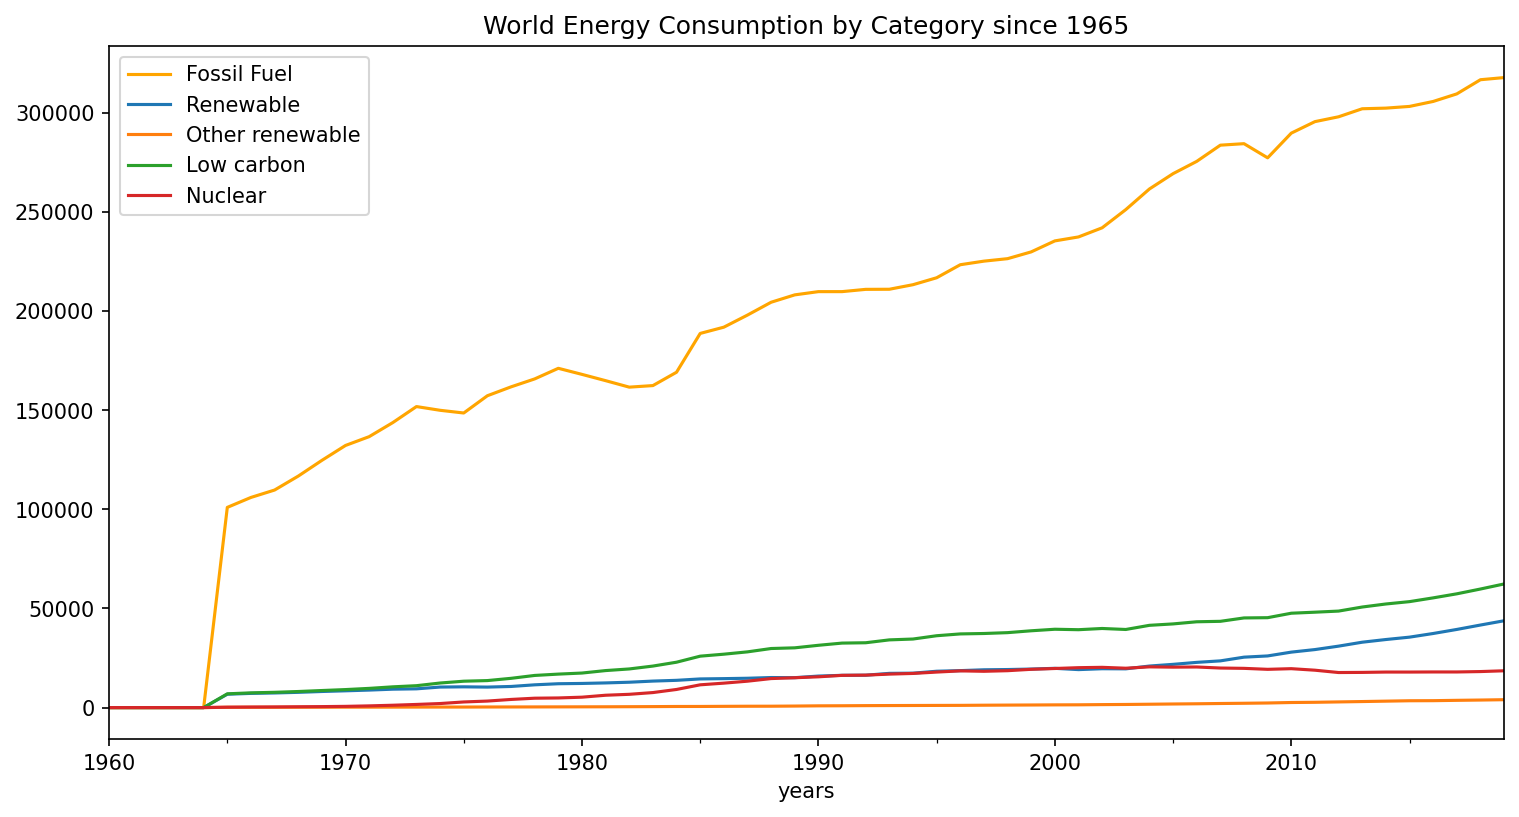

In [ ]:
#importing matplotlib module
import matplotlib.pyplot as plt
plt.style.use('default')

# code
# Visualizing The Open Price of all the stocks
  
# to set the plot size
plt.figure(figsize=(12, 6), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
Energy_consumption_by_country_year_group['fossil_fuel_consumption'].plot(label='Fossil Fuel', color='orange')
Energy_consumption_by_country_year_group['renewables_consumption'].plot(label='Renewable')
Energy_consumption_by_country_year_group['other_renewable_consumption'].plot(label='Other renewable')
Energy_consumption_by_country_year_group['low_carbon_consumption'].plot(label='Low carbon')
Energy_consumption_by_country_year_group['nuclear_consumption'].plot(label='Nuclear')


# adding title to the plot
plt.title('World Energy Consumption by Category since 1965')
  
# adding Label to the x-axis
plt.xlabel('years')
  
# adding legend to the curve
plt.legend()


In [ ]:
Energy_consumption_by_country_year_group.query('`country` == "Brazil"').plot(
    kind='line',x='year',y='renewables_consumption',
    # Set once in the first item we plot
    title='Brazil Energy Usage', figsize=(20,10),
    color='blue', linestyle='solid',
    ax=ax
    )

Energy_consumption_by_country_year_group.query('`country` == "China"').plot(
    kind='line',x='year',y='fossil_fuel_consumption',
    color='red', linestyle='dotted',
    ax=ax
    )

Energy_consumption_by_country_year_group.query('`country` == "Turkey"').plot(
    kind='line',x='year',y='fossil_fuel_consumption',
    color='red', linestyle='dotted',
    ax=ax
    )

Energy_consumption_by_country_year_group.query('`country` == "India"').plot(
    kind='line',x='year',y='fossil_fuel_consumption',
    color='red', linestyle='dotted',
    ax=ax
    )

Energy_consumption_by_country_year_group.query('`country` == "United States"').plot(
    kind='line',x='year',y='fossil_fuel_consumption',
    color='red', linestyle='dotted',
    ax=ax
    )

UndefinedVariableError: ignored

Train/Test for forecasting

In [ ]:
# test train split
from sklearn.model_selection import train_test_split

#split original DataFrame into training and testing sets
train, test = train_test_split(Energy_consumption_by_country_year_group, test_size=0.2, random_state=0)

#view first few rows of each set
print(train.head())


print(test.head())


#print size of each set
print(train.shape, test.shape)

In [ ]:
pip install skforecast

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

# Warnings configuration
# ==============================================================================
import warnings

In [ ]:
China = ['China']
China_cons = Energy_consumption_by_country_year.loc[(Energy_consumption_by_country_year['country'].isin(China)) & (Energy_consumption_by_country_year['year']>"1964"),['country','year','fossil_fuel_consumption']]
con=China_cons['year']
China_cons['year']=pd.to_datetime(China_cons['year'])
China_cons.set_index('year', inplace=True)
display(China_cons)

In [ ]:
#importing matplotlib module
import matplotlib.pyplot as plt
plt.style.use('default')

# code
# Visualizing The Open Price of all the stocks
  
# to set the plot size
plt.figure(figsize=(12, 6), dpi=150)
  
# in plot method we set the label and color of the curve.
China_cons['fossil_fuel_consumption'].plot(y='year',label='Fossil Fuel', color='orange')


# adding title to the plot
plt.title('China Fossil fuel consumption')

# adding Label to the x-axis
plt.xlabel('years')
  
# adding legend to the curve
plt.legend()


In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Creating a Linear Regression model on our data
lin = LinearRegression()

#define explanatory variable
x = China_cons['year'].values
#define response variable
y = China_cons['fossil_fuel_consumption'].values
#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())


In [ ]:
import seaborn as sns


In [ ]:
sns.regplot(x = "Hours", y = "Scores", data=data)